## Soal Latihan Fuzzy
https://github.com/aksalnvnza/KecerdasanBuatan/tree/main/Latihan

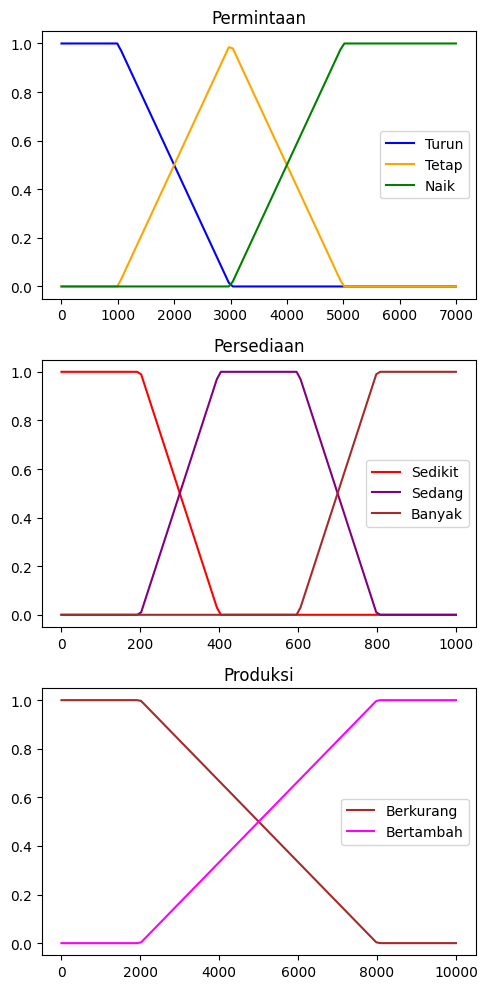

Masukkan nilai Permintaan:  3000
Masukkan nilai Persediaan:  400


Nilai Produksi (crisp) yang dihasilkan: 2000.00


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Fungsi Keanggotaan Fuzzy

# Permintaan: turun, tetap, naik
def permintaan_turun(x):
    return max(0, min((3000 - x) / 2000, 1))

def permintaan_tetap(x):
    return max(0, min((x - 1000) / 2000, (5000 - x) / 2000))

def permintaan_naik(x):
    return max(0, min((x - 3000) / 2000, 1))

# Persediaan: sedikit, sedang, banyak
def persediaan_sedikit(y):
    return max(0, min(1, (400 - y) / 200))

def persediaan_sedang(y):
    return max(0, min((y - 200)/ 200,1, (800 - y) / 200))

def persediaan_banyak(y):
    return max(0, min((y - 600) / 200, 1))

# Produksi: berkurang, bertambah
def produksi_berkurang(z):
    return max(0, min((8000 - z) / 6000, 1))

def produksi_bertambah(z):
    return max(0, min((z - 2000) / 6000, 1))

# Visualisasi Fungsi Keanggotaan
x_permintaan = np.linspace(0, 7000, 100)
y_persediaan = np.linspace(0, 1000, 100)
z_produksi = np.linspace(0, 10000, 100)

plt.figure(figsize=(5, 10))

# Grafik Permintaan
plt.subplot(3, 1, 1)
plt.plot(x_permintaan, [permintaan_turun(x) for x in x_permintaan], label='Turun', color='blue')
plt.plot(x_permintaan, [permintaan_tetap(x) for x in x_permintaan], label='Tetap', color='orange')
plt.plot(x_permintaan, [permintaan_naik(x) for x in x_permintaan], label='Naik', color='green')
plt.title('Permintaan')
plt.legend()

# Grafik Persediaan
plt.subplot(3, 1, 2)
plt.plot(y_persediaan, [persediaan_sedikit(y) for y in y_persediaan], label='Sedikit', color='red')
plt.plot(y_persediaan, [persediaan_sedang(y) for y in y_persediaan], label='Sedang', color='purple')
plt.plot(y_persediaan, [persediaan_banyak(y) for y in y_persediaan], label='Banyak', color='brown')
plt.title('Persediaan')
plt.legend()

# Grafik Produksi
plt.subplot(3, 1, 3)
plt.plot(z_produksi, [produksi_berkurang(z) for z in z_produksi], label='Berkurang', color='brown')
plt.plot(z_produksi, [produksi_bertambah(z) for z in z_produksi], label='Bertambah', color='magenta')
plt.title('Produksi')
plt.legend()

plt.tight_layout()
plt.show()

#Aturan Fuzzy
def tsukamoto(perintah, sedia):
    rules = []

    # Rule 1: Jika Permintaan Turun dan Persediaan Sedikit -> Produksi Bertambah
    a1 = min(permintaan_turun(perintah), persediaan_sedikit(sedia))
    z1 = 2000 + a1 * (8000 - 2000)  # Produksi Bertambah
    rules.append((a1, z1))

    # Rule 2: Jika Permintaan Turun dan Persediaan Sedang -> Produksi Berkurang
    a2 = min(permintaan_turun(perintah), persediaan_sedang(sedia))
    z2 = 8000 - a2 * (8000 - 2000)  # Produksi Berkurang
    rules.append((a2, z2))

    # Rule 3: Jika Permintaan Turun dan Persediaan Banyak -> Produksi Berkurang
    a3 = min(permintaan_turun(perintah), persediaan_banyak(sedia))
    z3 = 8000 - a3 * (8000 - 2000)  # Produksi Berkurang
    rules.append((a3, z3))

    # Rule 4: Jika Permintaan Tetap dan Persediaan Sedikit -> Produksi Bertambah
    a4 = min(permintaan_tetap(perintah), persediaan_sedikit(sedia))
    z4 = 2000 + a4 * (8000 - 2000)  # Produksi Bertambah
    rules.append((a4, z4))

    # Rule 5: Jika Permintaan Tetap dan Persediaan Sedang -> Produksi Berkurang
    a5 = min(permintaan_tetap(perintah), persediaan_sedang(sedia))
    z5 = 8000 - a5 * (8000 - 2000)  # Produksi Berkurang
    rules.append((a5, z5))

    # Rule 6: Jika Permintaan Tetap dan Persediaan Banyak -> Produksi Berkurang
    a6 = min(permintaan_tetap(perintah), persediaan_banyak(sedia))
    z6 = 8000 - a6 * (8000 - 2000)  # Produksi Berkurang
    rules.append((a6, z6))

    # Rule 7: Jika Permintaan Naik dan Persediaan Sedikit -> Produksi Bertambah
    a7 = min(permintaan_naik(perintah), persediaan_sedikit(sedia))
    z7 = 2000 + a7 * (8000 - 2000)  # Produksi Bertambah
    rules.append((a7, z7))

    # Rule 8: Jika Permintaan Naik dan Persediaan Sedang -> Produksi Bertambah
    a8 = min(permintaan_naik(perintah), persediaan_sedang(sedia))
    z8 = 2000 + a8 * (8000 - 2000)  # Produksi Bertambah
    rules.append((a8, z8))

    # Rule 9: Jika Permintaan Naik dan Persediaan Banyak -> Produksi Berkurang
    a9 = min(permintaan_naik(perintah), persediaan_banyak(sedia))
    z9 = 8000 - a9 * (8000 - 2000)  # Produksi Berkurang
    rules.append((a9, z9))

    # 3. Perhitungan Nilai Crisp
    numerator = sum(a * z for a, z in rules)
    denominator = sum(a for a, _ in rules)
    z_crisp = numerator / denominator if denominator != 0 else 0

    return z_crisp

# 4. Input dan Pengujian
permintaan = float(input("Masukkan nilai Permintaan: "))
persediaan = float(input("Masukkan nilai Persediaan: "))

hasil_produksi = tsukamoto(permintaan, persediaan)
print(f"Nilai Produksi (crisp) yang dihasilkan: {hasil_produksi:.2f}")